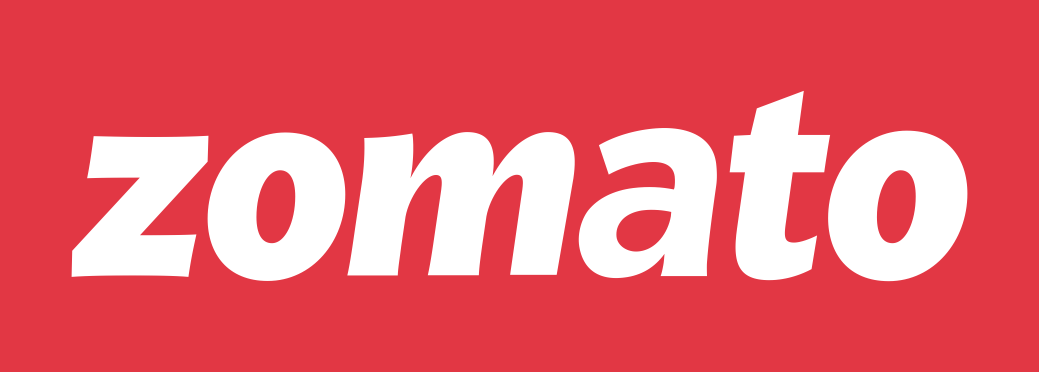

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing CSV

In [2]:
df = pd.read_csv('zomato.csv')
df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [3]:
df = df.drop(['url','address','phone','dish_liked','reviews_list','menu_item'],axis='columns')
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [5]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [6]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## Removing "NEW" ,  "-" and "/5" from Rate Column

In [7]:
def handlerate(value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [8]:
df['rate'] = df['rate'].apply(handlerate)

In [9]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

## Filling Null Values in Rate Column with Mean

In [10]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [11]:
df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70044882, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [13]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [14]:
df['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

## Cleaning Location Column

In [15]:
location = df['location'].value_counts()

In [16]:
location_lessthan500 = location[location<500]

In [17]:
def handlelocation(value):
    if(value in location_lessthan500):
        return 'others'
    else:
        return value
    

In [18]:
df['location'] = df['location'].apply(handlelocation)

In [19]:
df['location'].value_counts(ascending=False)

others                   8120
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              906
Kalyan Nagar              853
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Banaswadi                 664
Brookefield               658
New BEL Road              649
Kammanahalli              648
Rajajinagar               591
Church Street             569
Lavelle Ro

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


## Cleaning Rest Type Column

In [21]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [22]:
rest_type = df['rest_type'].value_counts(ascending=False)

## Making Rest Types less than 1000 in frequency as others

In [23]:
rest_typelessthan1000 = rest_type[rest_type<1000]

In [24]:
def handleresttype(value):
    if(value in rest_typelessthan1000):
        return 'others'
    else:
        return value

In [25]:
df['rest_type'] = df['rest_type'].apply(handleresttype)

In [26]:
df['rest_type'].value_counts(ascending=False)

Quick Bites           19132
Casual Dining         10330
others                 9097
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Name: rest_type, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


## Cleaning Cuisines Column


In [28]:
df['cuisines'].value_counts(ascending = False)

North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2723, dtype: int64

In [29]:
cuisines = df['cuisines'].value_counts(ascending=False)

In [30]:
cuisines_lessthan120 = cuisines[cuisines<120]

In [31]:
def handle_cuisines(value):
    if(value in cuisines_lessthan120):
        return 'others'
    else:
        return value

In [32]:
df['cuisines'] = df['cuisines'].apply(handle_cuisines)

In [33]:
df['cuisines'].value_counts(ascending=False)

others                                27201
North Indian                           2913
North Indian, Chinese                  2385
South Indian                           1828
Biryani                                 918
                                      ...  
Fast Food, Burger                       135
Beverages, Desserts                     130
Biryani, South Indian                   127
Mithai                                  127
North Indian, Chinese, Continental      126
Name: cuisines, Length: 63, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51717 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


## Renaming 'approx_cost(for two people)' and 'listed_in(type)' columns

In [35]:
df.rename(columns = {'approx_cost(for two people)':'cost2plates','listed_in(type)':'type'},inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51717 non-null  object 
 1   online_order     51717 non-null  object 
 2   book_table       51717 non-null  object 
 3   rate             51717 non-null  float64
 4   votes            51717 non-null  int64  
 5   location         51696 non-null  object 
 6   rest_type        51490 non-null  object 
 7   cuisines         51672 non-null  object 
 8   cost2plates      51371 non-null  object 
 9   type             51717 non-null  object 
 10  listed_in(city)  51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [37]:
df['cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

## Removing ',' from Cost2Plates Column

In [38]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
    
    

In [39]:
df['cost2plates'] = df['cost2plates'].apply(handlecomma)

In [40]:
df['cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [41]:
df['cost2plates'].fillna(df['cost2plates'].mean(),inplace=True)

In [42]:
df['cost2plates'].unique()

array([ 800.        ,  300.        ,  600.        ,  700.        ,
        550.        ,  500.        ,  450.        ,  650.        ,
        400.        ,  900.        ,  200.        ,  750.        ,
        150.        ,  850.        ,  100.        , 1200.        ,
        350.        ,  250.        ,  950.        , 1000.        ,
       1500.        , 1300.        ,  199.        ,   80.        ,
       1100.        ,  160.        , 1600.        ,  230.        ,
        130.        ,   50.        ,  190.        , 1700.        ,
        555.43156645, 1400.        ,  180.        , 1350.        ,
       2200.        , 2000.        , 1800.        , 1900.        ,
        330.        , 2500.        , 2100.        , 3000.        ,
       2800.        , 3400.        ,   40.        , 1250.        ,
       3500.        , 4000.        , 2400.        , 2600.        ,
        120.        , 1450.        ,  469.        ,   70.        ,
       3200.        ,   60.        ,  560.        ,  240.     

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51717 non-null  object 
 1   online_order     51717 non-null  object 
 2   book_table       51717 non-null  object 
 3   rate             51717 non-null  float64
 4   votes            51717 non-null  int64  
 5   location         51696 non-null  object 
 6   rest_type        51490 non-null  object 
 7   cuisines         51672 non-null  object 
 8   cost2plates      51717 non-null  float64
 9   type             51717 non-null  object 
 10  listed_in(city)  51717 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB


In [44]:
df['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

## Listed in(city) and location, both are there, lets keep only one.

In [45]:
df = df.drop(['listed_in(city)'],axis='columns')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          51717 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   cost2plates   51717 non-null  float64
 9   type          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


## Dropping Null Values

In [47]:
df.dropna(inplace=True)

## Visualizing Online Order

<AxesSubplot:xlabel='online_order', ylabel='count'>

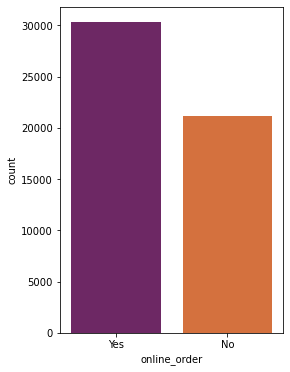

In [48]:
plt.figure(figsize=(4,6))
sns.countplot(df['online_order'], palette = 'inferno')


## Visualizing Book Table


<AxesSubplot:xlabel='book_table', ylabel='count'>

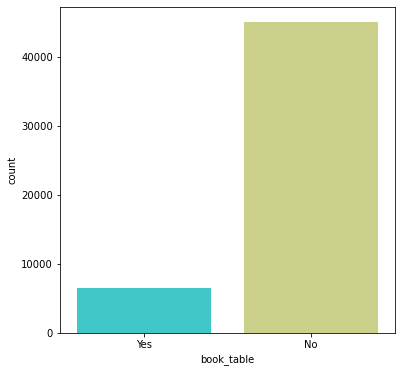

In [49]:
plt.figure(figsize = (6,6))
sns.countplot(df['book_table'], palette = 'rainbow')

## Visualizing Online Order vs Rate

<AxesSubplot:xlabel='online_order', ylabel='rate'>

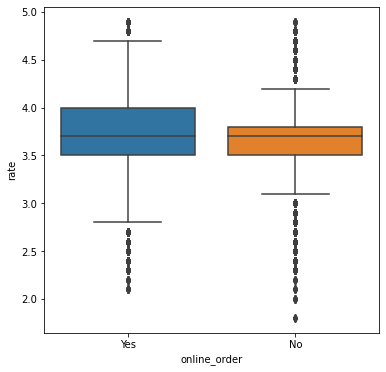

In [50]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

## Visualizing Book Table vs Rate

<AxesSubplot:xlabel='book_table', ylabel='rate'>

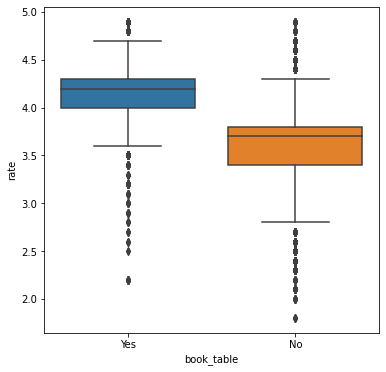

In [51]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

## Visualizing Book Table Facility, Location Wise


In [52]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1792  3305
Banashankari            397   507
Banaswadi               313   343
Bannerghatta Road       700   924
Basavanagudi            243   441
Bellandur               519   752
Brigade Road            553   665
Brookefield             241   417
Church Street           226   343
Electronic City         677   572
Frazer Town             295   432
HSR                     600  1911
Indiranagar             744  1332
JP Nagar                914  1308
Jayanagar               560  1364
Kalyan Nagar            353   491
Kammanahalli            268   375
Koramangala 1st Block   385   853
Koramangala 4th Block   459   558
Koramangala 5th Block   890  1614
Koramangala 6th Block   457   684
Koramangala 7th Block   395   786
Lavelle Road            323   206
MG Road                 544   374
Malleshwaram            310   415
Marathahalli            718  1107
New BEL Road            257   389
Rajajinagar             286   305
Residency Road          427   248
Richmond Road           565   247
Sarjapur Road           332   725
Shanti Nagar            289   222
Ulsoor                  395   628
Whitefield              997  1123
others                 3731  4345

<AxesSubplot:xlabel='location'>

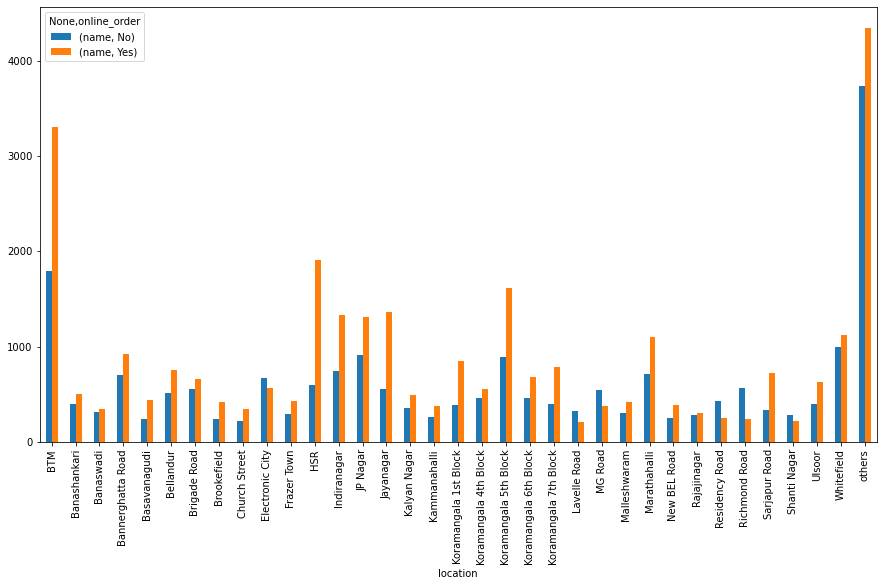

In [53]:
df1.plot(kind = 'bar', figsize = (15,8))

## Visualizing Types of Restaurants vs Rate 

<AxesSubplot:xlabel='type', ylabel='rate'>

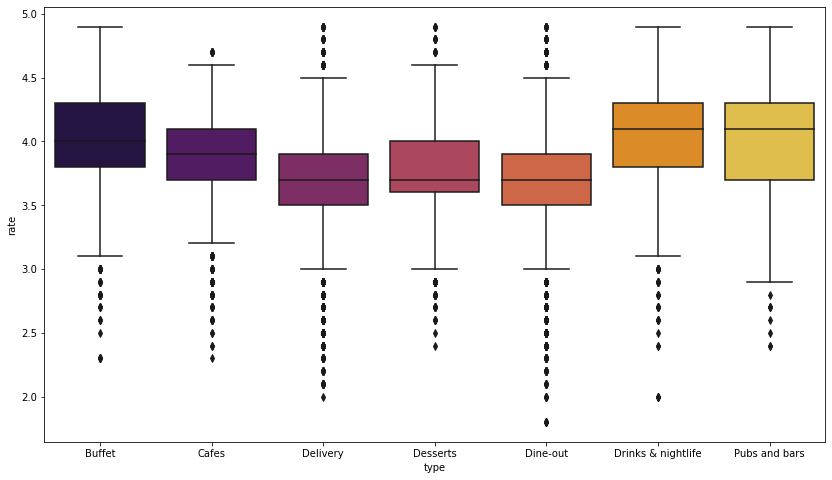

In [54]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'type', y = 'rate', data = df, palette = 'inferno')

## Visualizing Type Table


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Buffet'),
  Text(1, 0, 'Cafes'),
  Text(2, 0, 'Delivery'),
  Text(3, 0, 'Desserts'),
  Text(4, 0, 'Dine-out'),
  Text(5, 0, 'Drinks & nightlife'),
  Text(6, 0, 'Pubs and bars')])

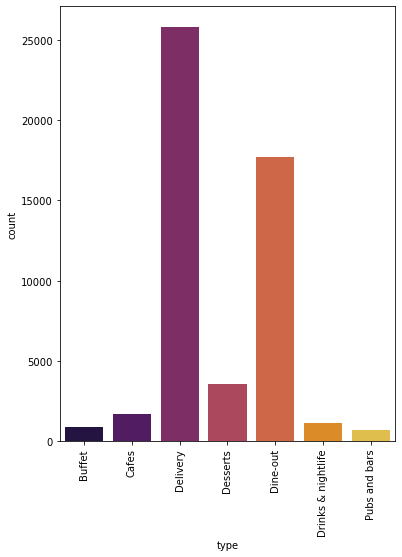

In [55]:
plt.figure(figsize=(6,8))
sns.countplot(df['type'], palette = 'inferno')
plt.xticks(rotation=90)